In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from pandas_datareader import data as pdr # To import stock data from yahoo

# Example taken from datacamp.com

### Importing data

In [4]:
end_date = datetime.datetime(2021, 2, 24)
time_delta_days = datetime.timedelta(200)

aapl = pdr.get_data_yahoo('AAPL', 
                          start=end_date-time_delta_days, 
                          end=end_date)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.365448
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.023705
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,112.647041
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,114.640610
2020-08-14,115.000000,113.044998,114.830002,114.907501,165565200.0,114.538445


### Calculating moving averages

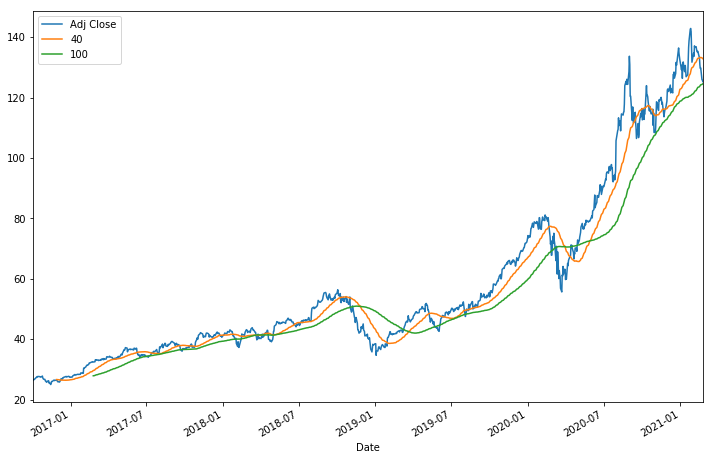

In [55]:
# Short moving window rolling mean
aapl['40'] = aapl['Adj Close'].rolling(window=40).mean()

# Long moving window rolling mean
aapl['100'] = aapl['Adj Close'].rolling(window=100).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '40', '100']].plot(figsize=(12,8))

# Show plot
plt.show()

### Getting signals from MA

In [24]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [25]:
# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2016-10-03     0.0   28.129999   28.129999        NaN
2016-10-04     0.0   28.190000   28.190000        0.0
2016-10-05     0.0   28.214167   28.214167        0.0
2016-10-06     0.0   28.278750   28.278750        0.0
2016-10-07     0.0   28.326000   28.326000        0.0
2016-10-10     0.0   28.440417   28.440417        0.0
2016-10-11     0.0   28.531072   28.531072        0.0
2016-10-12     0.0   28.631562   28.631562        0.0
2016-10-13     0.0   28.699722   28.699722        0.0
2016-10-14     0.0   28.770500   28.770500        0.0
2016-10-17     0.0   28.826591   28.826591        0.0
2016-10-18     0.0   28.871667   28.871667        0.0
2016-10-19     0.0   28.903077   28.903077        0.0
2016-10-20     0.0   28.928929   28.928929        0.0
2016-10-21     0.0   28.943667   28.943667        0.0
2016-10-24     0.0   28.972969   28.972969        0.0
2016-10-25     0.0   29.0076

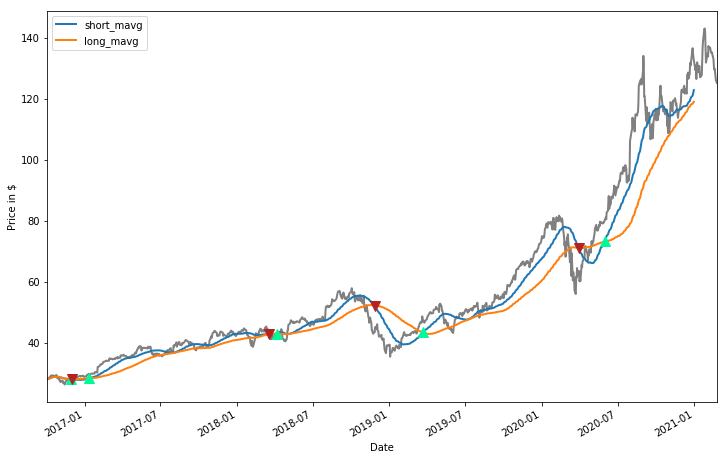

In [59]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='grey', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='mediumspringgreen')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='firebrick')

# Show the plot
plt.show()

If we want to repeat this entire process for MSFT, BAC, TSLA, GME

### Object Oriented Programming

In [60]:
class Analysis():
    
    def __init__(self,tikr_name,start_date,end_date):
        self.name = tikr_name
        self.tikr = pdr.get_data_yahoo(self.name,start=start_date, end=end_date)
        
    def analyze(self,short_window,long_window):
#         # Initialize the short and long windows
#         short_window = 40
#         long_window = 100

        # Initialize the `signals` DataFrame with the `signal` column
        signals = pd.DataFrame(index=self.tikr.index)
        signals['signal'] = 0.0

        # Create short simple moving average over the short window
        signals['short_mavg'] = self.tikr['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

        # Create long simple moving average over the long window
        signals['long_mavg'] = self.tikr['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

        # Create signals
        signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                    > signals['long_mavg'][short_window:], 1.0, 0.0)   

        # Generate trading orders
        signals['positions'] = signals['signal'].diff()
        
        self.signals = signals
        self.print_analysis()
        
    def print_analysis(self):
        
        # Initialize the plot figure
        fig = plt.figure(figsize=(12,8))

        # Add a subplot and label for y-axis
        ax1 = fig.add_subplot(111,  ylabel='Price in $')

        # Plot the closing price
        self.tikr['Close'].plot(ax=ax1, color='grey', lw=2.)

        # Plot the short and long moving averages
        self.signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

        # Plot the buy signals
        ax1.plot(self.signals.loc[self.signals.positions == 1.0].index, 
                 self.signals.short_mavg[self.signals.positions == 1.0],
                 '^', markersize=10, color='mediumspringgreen')

        # Plot the sell signals
        ax1.plot(self.signals.loc[self.signals.positions == -1.0].index, 
                 self.signals.short_mavg[self.signals.positions == -1.0],
                 'v', markersize=10, color='firebrick')
        plt.title(f'{self.name}')
        # Show the plot
        plt.show()

In [63]:
apple = Analysis('AAPL',datetime.datetime(2016, 10, 1),datetime.datetime(2021, 1, 1))

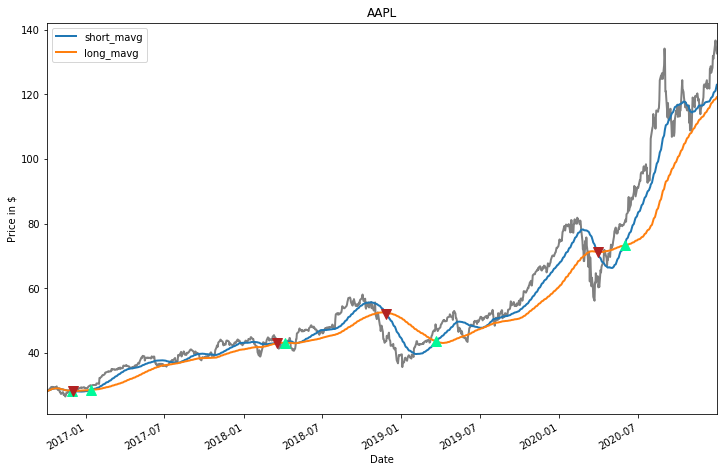

In [64]:
apple.analyze(40,100)

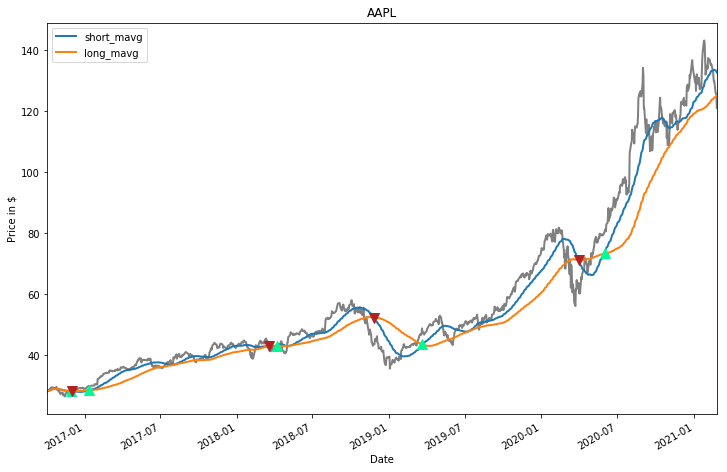

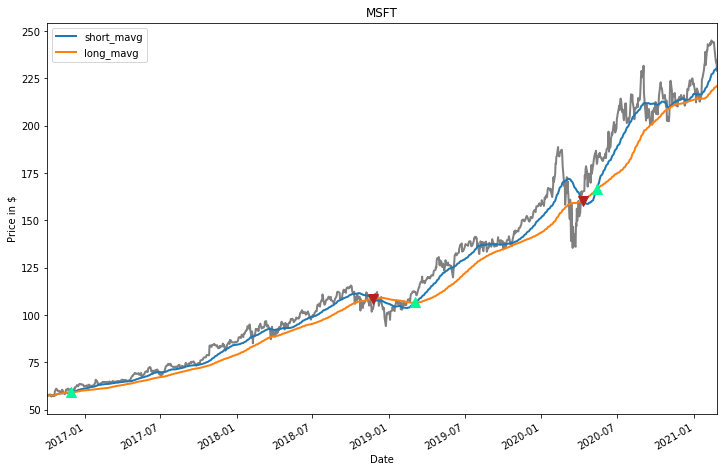

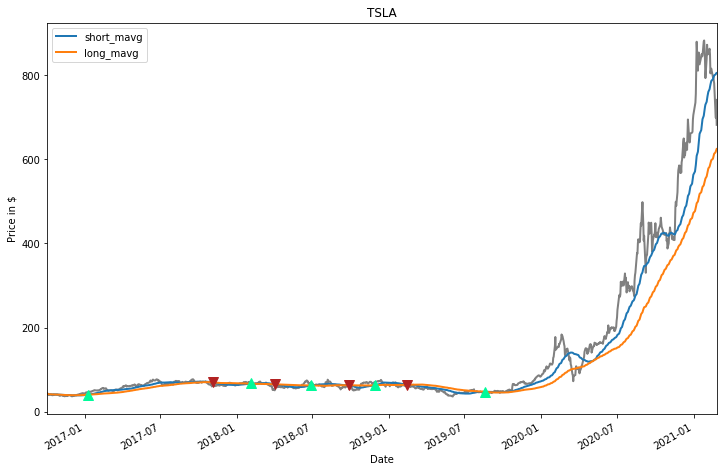

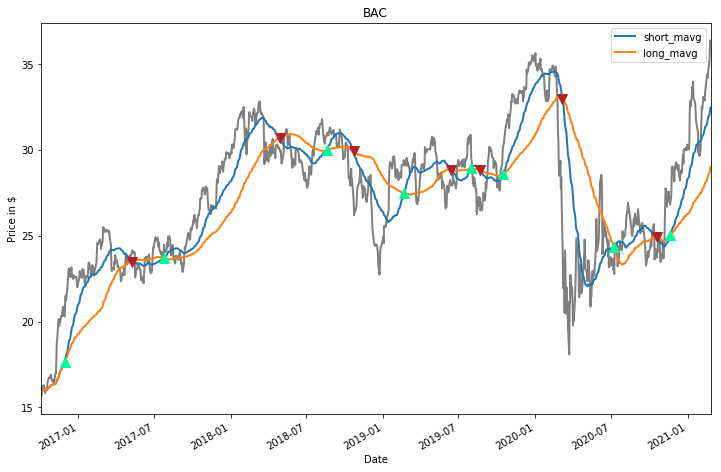

In [65]:
stocks = ['AAPL','MSFT','TSLA','BAC']

for stock in stocks:
    tikr = Analysis(stock,datetime.datetime(2016, 10, 1),datetime.datetime(2021, 2, 25))
    tikr.analyze(40,100)

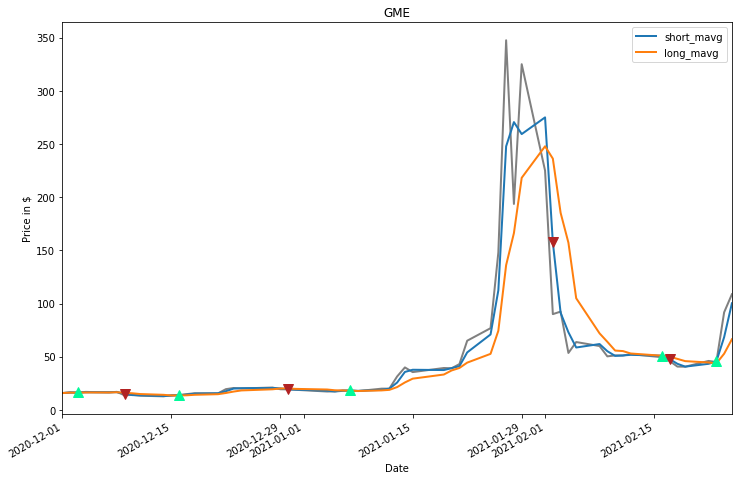

In [72]:
gamestop = Analysis('GME',datetime.datetime(2020, 12, 1),datetime.datetime(2021, 2, 26))
gamestop.analyze(2,5)